# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import urllib.parse           # urllib.parse.urlencode()

# Impor the OpenWeatherMap API key
import api_keys

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

print(api_keys.weather_api_key)

Number of cities in the list: 608
5dfe1b707b2e6f7c57f6720977af5e51


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

"""
    From docs: https://openweathermap.org/current
    https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
"""

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    query_string_dict = {
        'q': city,
        'appid': api_keys.weather_api_key
    }
    query_string = urllib.parse.urlencode(query_string_dict)

    # Create endpoint URL with each city
    city_url = f'{url}?{query_string}'

    record_count += 1

    try:
        city_weather = requests.get(city_url).json()

        # JSON RESPONSE STRUCTURE: 
        # {
        #   'coord': {'lon': -154.9731, 'lat': 19.5933}, 
        #   'weather': [
        #           {'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}
        #   ], 
        #   'base': 'stations', 
        #   'main': { 'temp': 298.52, 'feels_like': 298.89, 'temp_min': 296.88, 'temp_max': 299.19, 'pressure': 1018, 'humidity': 68, 'sea_level': 1018, 'grnd_level': 1012 }, 
        #   'visibility': 10000, 
        #   'wind': {'speed': 2.57, 'deg': 180}, 
        #   'clouds': {'all': 75}, 
        #   'dt': 1739051017, 
        #   'sys': {'type': 2, 'id': 2087107, 'country': 'US', 'sunrise': 1739033524, 'sunset': 1739074573}, 
        #   'timezone': -36000, 
        #   'id': 5855809, 
        #   'name': 'Hawaiian Paradise Park', 
        #   'cod': 200
        # }

        
        coords = city_weather['coord']
        main = city_weather['main']
        sys = city_weather['sys']

        city_lat, city_lng = coords['lat'], coords['lon']
        city_max_temp = main['temp_max']
        city_humidity = main['humidity']
        city_clouds = city_weather['clouds']
        city_wind = city_weather['wind']['speed']
        city_country = sys['country']
        city_date = city_weather['dt']

        d = {
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        }
        
        city_data.append(d)
        print(d)


    except:
        print(f'{city_url} not found')
        pass
    finally:
        print('sleeping for 1s....')
        time.sleep(1)

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
{'City': 'cabo san lucas', 'Lat': 22.8909, 'Lng': -109.9124, 'Max Temp': 301.32, 'Humidity': 26, 'Cloudiness': {'all': 0}, 'Wind Speed': 4.12, 'Country': 'MX', 'Date': 1739053154}
sleeping for 1s....
{'City': 'tiksi', 'Lat': 71.6872, 'Lng': 128.8694, 'Max Temp': 249.61, 'Humidity': 91, 'Cloudiness': {'all': 59}, 'Wind Speed': 5.84, 'Country': 'RU', 'Date': 1739053435}
sleeping for 1s....
{'City': 'jamestown', 'Lat': 42.097, 'Lng': -79.2353, 'Max Temp': 271.49, 'Humidity': 59, 'Cloudiness': {'all': 100}, 'Wind Speed': 4.63, 'Country': 'US', 'Date': 1739053436}
sleeping for 1s....
{'City': 'hobyo', 'Lat': 5.3505, 'Lng': 48.5268, 'Max Temp': 296.53, 'Humidity': 81, 'Cloudiness': {'all': 79}, 'Wind Speed': 4.6, 'Country': 'SO', 'Date': 1739053437}
sleeping for 1s....
http://api.openweathermap.org/data/2.5/weather?q=vingt+cinq&appid=5dfe1b707b2e6f7c57f6720977af5e51 not found
sleeping for 1s....
{'City': 'yellowknife', 'Lat': 62.456

In [12]:
##### # FIX city_data list
#for x in city_data:
#    x['Cloudiness'] = x['Cloudiness']['all']

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cabo san lucas,22.8909,-109.9124,301.32,26,0,4.12,MX,1739053154
1,tiksi,71.6872,128.8694,249.61,91,59,5.84,RU,1739053435
2,jamestown,42.0970,-79.2353,271.49,59,100,4.63,US,1739053436
3,hobyo,5.3505,48.5268,296.53,81,79,4.60,SO,1739053437
4,yellowknife,62.4560,-114.3525,247.27,83,75,5.66,CA,1739053193


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cabo san lucas,22.8909,-109.9124,301.32,26,0,4.12,MX,1739053154
1,tiksi,71.6872,128.8694,249.61,91,59,5.84,RU,1739053435
2,jamestown,42.0970,-79.2353,271.49,59,100,4.63,US,1739053436
3,hobyo,5.3505,48.5268,296.53,81,79,4.60,SO,1739053437
4,yellowknife,62.4560,-114.3525,247.27,83,75,5.66,CA,1739053193


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

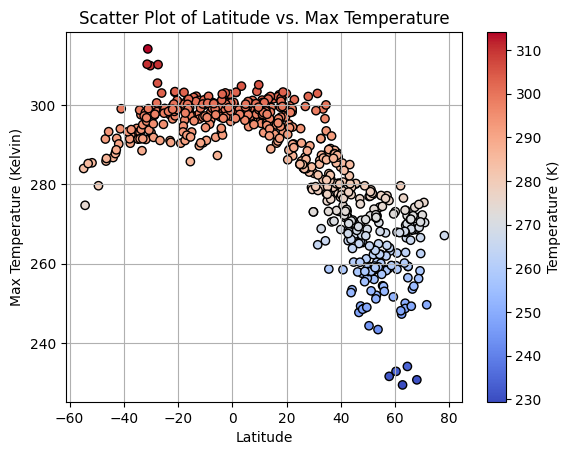

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], c=city_data_df["Max Temp"], cmap="coolwarm", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Kelvin)")
plt.title("Scatter Plot of Latitude vs. Max Temperature")
plt.colorbar(label="Temperature (K)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

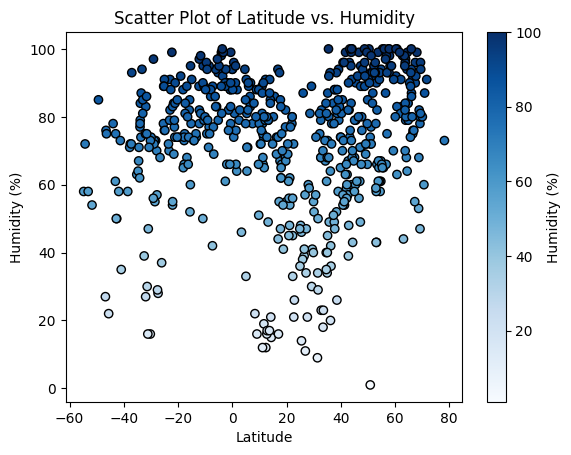

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], c=city_data_df["Humidity"], cmap="Blues", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Scatter Plot of Latitude vs. Humidity")
plt.colorbar(label="Humidity (%)")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

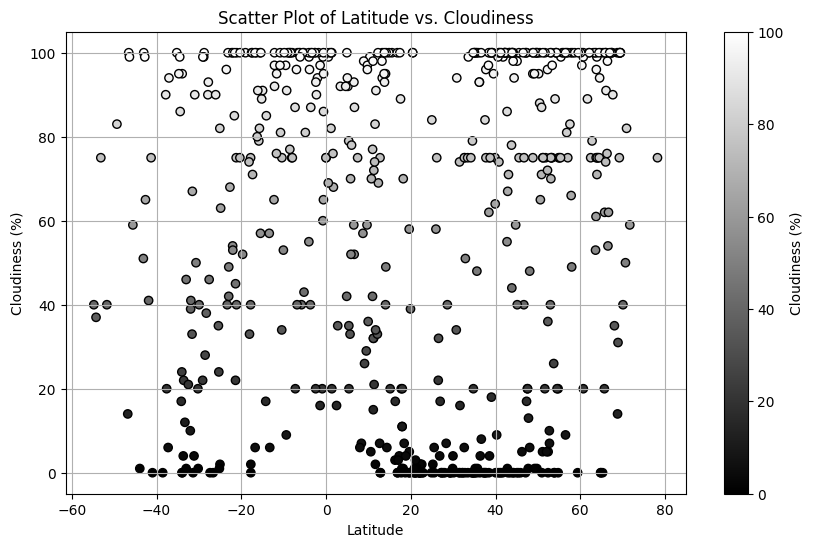

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], c=city_data_df["Cloudiness"], cmap="gray", edgecolors="black")

# Graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Scatter Plot of Latitude vs. Cloudiness")
plt.colorbar(label="Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

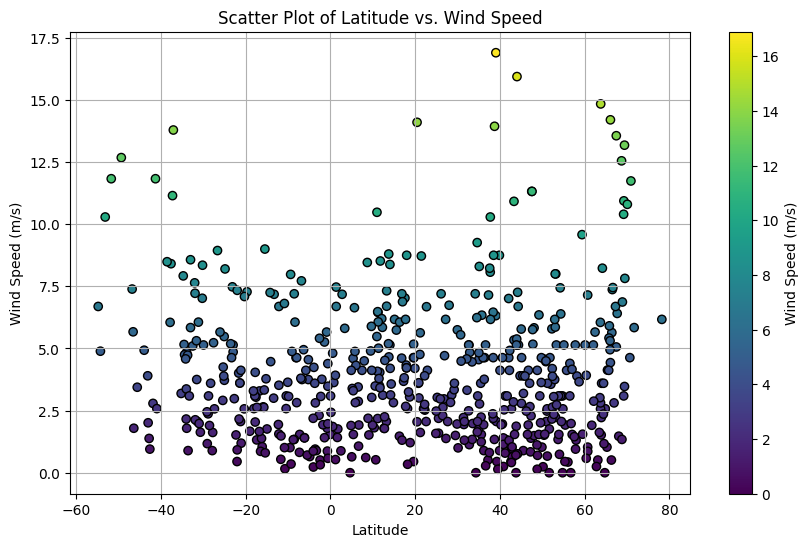

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], c=city_data_df["Wind Speed"], cmap="viridis", edgecolors="black")

# Graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Scatter Plot of Latitude vs. Wind Speed")
plt.colorbar(label="Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def create_linreg_plot(x, y):
    slope, intercept, r, p, std_err = linregress(x, y)
    line = np.array(x) * slope + intercept

    plt.scatter(x, y, c=y, cmap='coolwarm', edgecolors='black', label='Data Points')
    plt.plot(x, line, color='red', linewidth=2, label=f"Regression Line (R square = {r**2:.3f})")



In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cabo san lucas,22.8909,-109.9124,301.32,26,0,4.12,MX,1739053154
1,tiksi,71.6872,128.8694,249.61,91,59,5.84,RU,1739053435
2,jamestown,42.0970,-79.2353,271.49,59,100,4.63,US,1739053436
3,hobyo,5.3505,48.5268,296.53,81,79,4.60,SO,1739053437
4,yellowknife,62.4560,-114.3525,247.27,83,75,5.66,CA,1739053193


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,waitangi,-43.9535,-176.5597,286.72,78,1,4.93,NZ,1739053440
7,mata-utu,-13.2816,-176.1745,302.18,74,6,7.18,WF,1739053444
13,lebu,-37.6167,-73.6500,290.33,72,20,8.41,CL,1739053453
14,boca suno,-0.7167,-77.1333,297.71,88,99,0.87,EC,1739053454
18,adamstown,-25.0660,-130.1015,299.03,76,82,5.48,PN,1739053459


###  Temperature vs. Latitude Linear Regression Plot

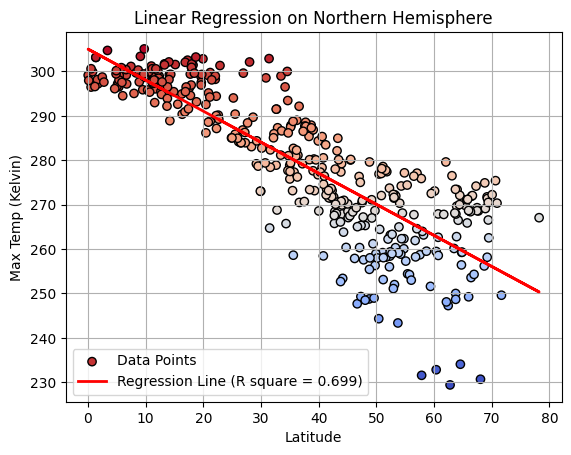

In [39]:
# Linear regression on Northern Hemisphere
create_linreg_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

plt.xlabel('Latitude')
plt.ylabel('Max Temp (Kelvin)')
plt.title('Linear Regression on Northern Hemisphere')
plt.legend()
plt.grid(True)

plt.savefig("output_data/northern-linear-regression-temp.png")


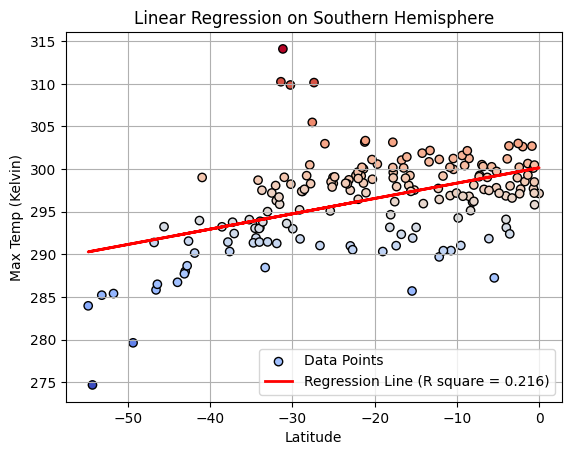

In [40]:
# Linear regression on Southern Hemisphere
create_linreg_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

plt.xlabel('Latitude')
plt.ylabel('Max Temp (Kelvin)')
plt.title('Linear Regression on Southern Hemisphere')
plt.legend()
plt.grid(True)

plt.savefig("output_data/southern-linear-regression-temp.png")

**Discussion about the linear relationship:** 

- In northern hemisphere, when latitude increases, max temp _decreases_.

- In southern hemisphere, when latitude increases, max temp _increases_.

### Humidity vs. Latitude Linear Regression Plot

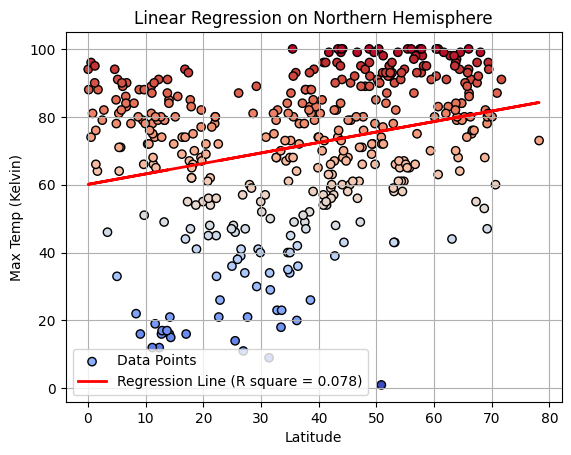

In [41]:
# Northern Hemisphere

create_linreg_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

plt.xlabel('Latitude')
plt.ylabel('Max Temp (Kelvin)')
plt.title('Linear Regression on Northern Hemisphere')
plt.legend()
plt.grid(True)

plt.savefig("output_data/northern-linear-regression-humidity.png")



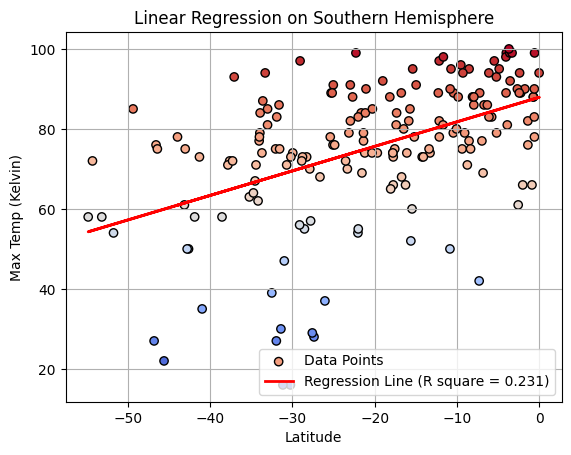

In [42]:
# Southern Hemisphere
create_linreg_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

plt.xlabel('Latitude')
plt.ylabel('Max Temp (Kelvin)')
plt.title('Linear Regression on Southern Hemisphere')
plt.legend()
plt.grid(True)

plt.savefig("output_data/southern-linear-regression-humidity.png")

**Discussion about the linear relationship:** 

- low latitude (nearer to equator) produces lower humidity
- higher latituds (further from equator) producer higher humidity

### Cloudiness vs. Latitude Linear Regression Plot

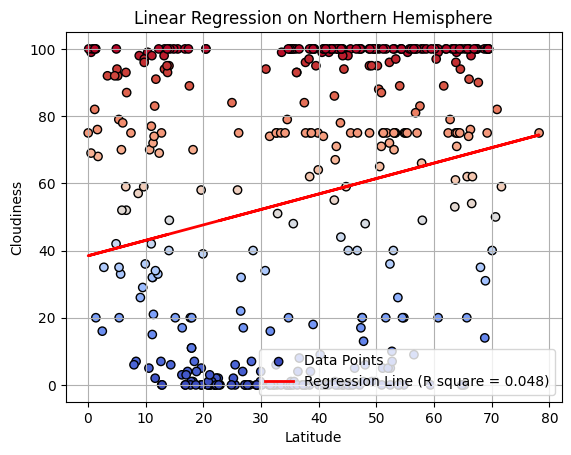

In [44]:
# Northern Hemisphere
create_linreg_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression on Northern Hemisphere')
plt.legend()
plt.grid(True)

plt.savefig("output_data/northern-linear-regression-cloudiness.png")

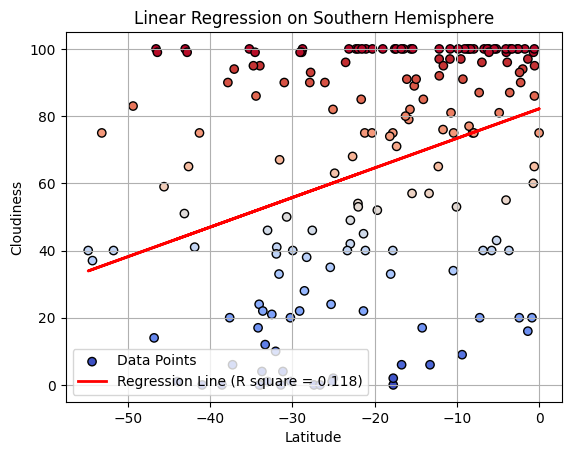

In [45]:
# Southern Hemisphere
create_linreg_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression on Southern Hemisphere')
plt.legend()
plt.grid(True)

plt.savefig("output_data/southern-linear-regression-cloudiness.png")

**Discussion about the linear relationship:** 

- reg line positive for both hemispheres, so as we get further from the equator, cloudiness increases

### Wind Speed vs. Latitude Linear Regression Plot

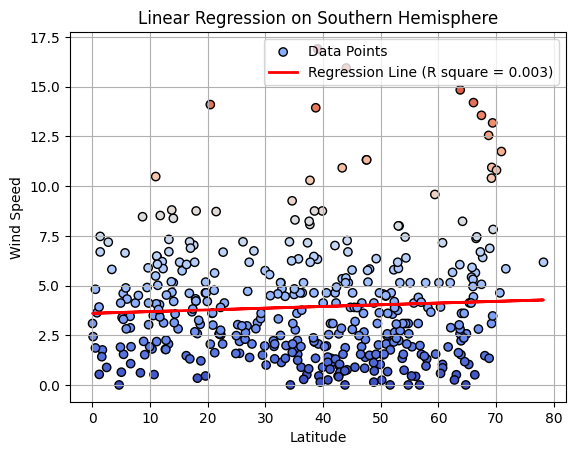

In [46]:
# Northern Hemisphere
create_linreg_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression on Southern Hemisphere')
plt.legend()
plt.grid(True)

plt.savefig("output_data/northern-linear-regression-windspeed.png")

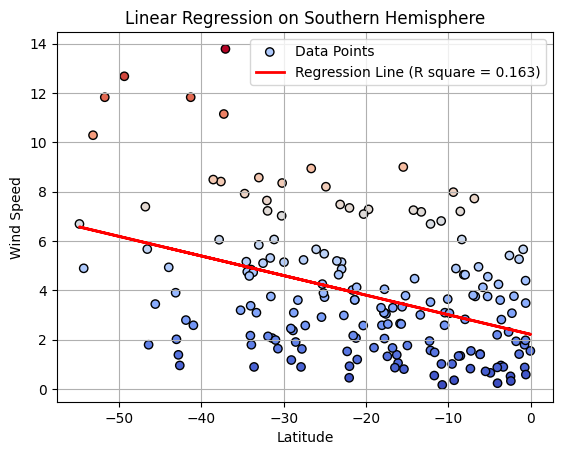

In [47]:
# Southern Hemisphere
# Northern Hemisphere
create_linreg_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression on Southern Hemisphere')
plt.legend()
plt.grid(True)

plt.savefig("output_data/southern-linear-regression-windspeed.png")